In [48]:
# import some basic libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [49]:
df = pd.read_csv("Cheapestelectriccars-EVDatabase.csv")

In [50]:

df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [51]:

df.columns.tolist()

['Name',
 'Subtitle',
 'Acceleration',
 'TopSpeed',
 'Range',
 'Efficiency',
 'FastChargeSpeed',
 'Drive',
 'NumberofSeats',
 'PriceinGermany',
 'PriceinUK']

In [52]:

#filling empty data with 0
df=df.fillna('0')

In [53]:

# get the name of the car manufacturer from the car name
df['Manufacturer'] = df['Name'].astype(str).str.split(' ', n=1, expand=True)[0]


In [54]:
#cleaning the data
#removing currency sign
PriceinUK=[]
for item in df['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
df['PriceinUK']=PriceinUK

In [55]:
PriceinGermany=[]
for item in df['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
df['PriceinGermany']=PriceinGermany

In [56]:
# prepare the data for Fast Charging Speed
FastChargeSpeed=[]
for item in df['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df['FastChargeSpeed']=FastChargeSpeed

In [57]:
Efficiency=[]
for item in df['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
df['Efficiency']=Efficiency

In [58]:
Range=[]
for item in df['Range']:
    Range+=[int(item.replace(' km',''))]
df['Range']=Range

TopSpeed=[]
for item in df['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
df['TopSpeed']=TopSpeed

Acceleration=[]
for item in df['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
df['Acceleration']=Acceleration

Subtitle=[]
for item in df['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df['Subtitle']=Subtitle

In [59]:

df= df.rename(columns = {'Subtitle':'KWH'})

In [60]:

df.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


In [61]:

# Shape of the dataset
df.shape

(180, 12)

In [62]:
# Print the name of columns
df.columns

Index(['Name', 'KWH', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency',
       'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany',
       'PriceinUK', 'Manufacturer'],
      dtype='object')

In [63]:

# Check for NULL Values
df.isnull().sum()

Name               0
KWH                0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
PriceinGermany     0
PriceinUK          0
Manufacturer       0
dtype: int64

In [64]:

# Check unique values
df.nunique()

Name               174
KWH                 61
Acceleration        77
TopSpeed            35
Range               68
Efficiency          80
FastChargeSpeed     69
Drive                3
NumberofSeats        4
PriceinGermany     152
PriceinUK          124
Manufacturer        37
dtype: int64

In [65]:

# Check for Duplicate values
df.duplicated().sum()

0

In [66]:

# the nature of the data and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 17.0+ KB


In [67]:

# Describe of the dataset
df.describe()

,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,65.263889,7.854444,176.400000,337.388889,194.272222,467.888889,5.166667,54810.361111,39998.400000
std,24.952074,3.169465,42.096006,118.718078,32.684001,252.128346,0.971666,34852.347982,33768.589005
min,16.700000,2.100000,123.000000,95.000000,104.000000,0.000000,2.000000,0.000000,0.000000
25%,45.000000,5.575000,150.000000,258.750000,168.000000,280.000000,5.000000,35425.000000,19646.250000
50%,66.500000,7.500000,160.000000,340.000000,188.500000,420.000000,5.000000,49500.000000,37270.000000
75%,77.400000,9.625000,200.000000,400.000000,215.250000,590.000000,5.000000,62262.500000,55912.500000
max,200.000000,22.400000,410.000000,970.000000,281.000000,1410.000000,7.000000,215000.000000,189000.000000


In [68]:

# the correlation between the data.
df.corr(numeric_only=True)

,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
KWH,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447,0.598084,0.621253
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302,-0.501519,-0.674273
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567,0.678865,0.792669
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851,0.569037,0.620757
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469,0.239221,0.084527
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644,0.595609,0.650851
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000,-0.012455,-0.211985
PriceinGermany,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.012455,1.000000,0.698753
PriceinUK,0.621253,-0.674273,0.792669,0.620757,0.084527,0.650851,-0.211985,0.698753,1.000000


<Axes: >

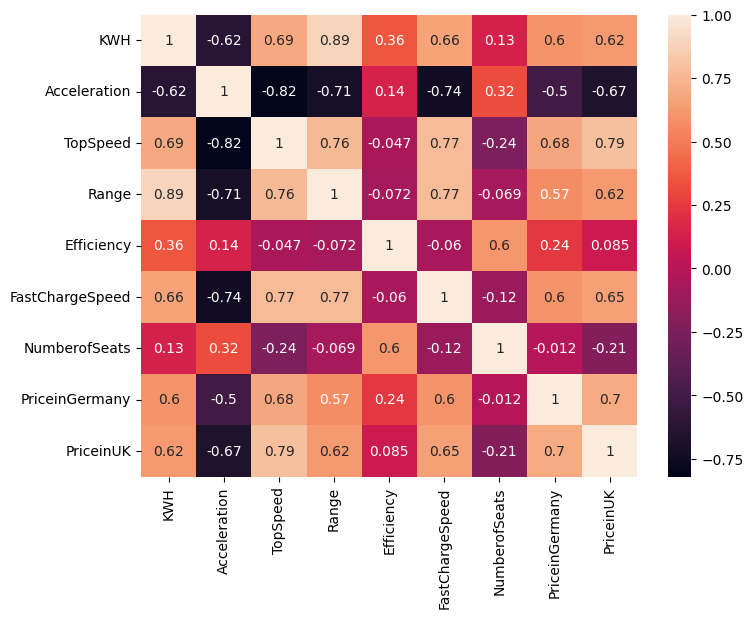

In [69]:

# the correlation better using a heat map
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='Drive', ylabel='count'>

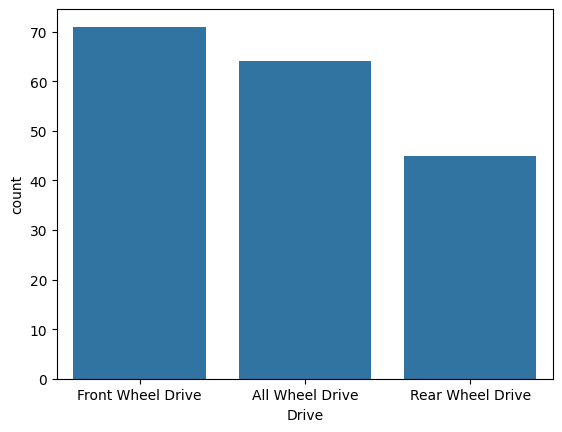

In [70]:
# the count of each type of drive for the vehicles
sns.countplot(x = 'Drive', data = df)

<Axes: xlabel='NumberofSeats', ylabel='count'>

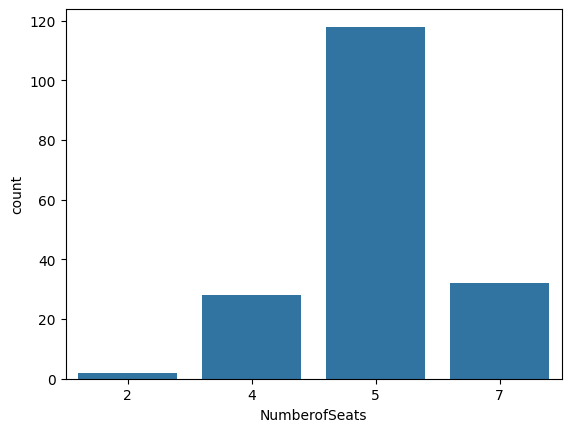

In [71]:
# the distribution of the number of seats
sns.countplot(x = 'NumberofSeats', data = df)

<Axes: xlabel='NumberofSeats', ylabel='count'>

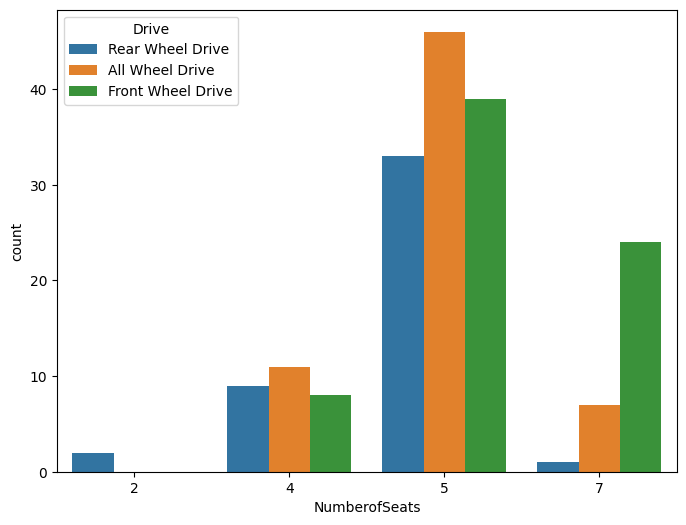

In [72]:
# the data distribution considering both, the number of seats and type of drive
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df)

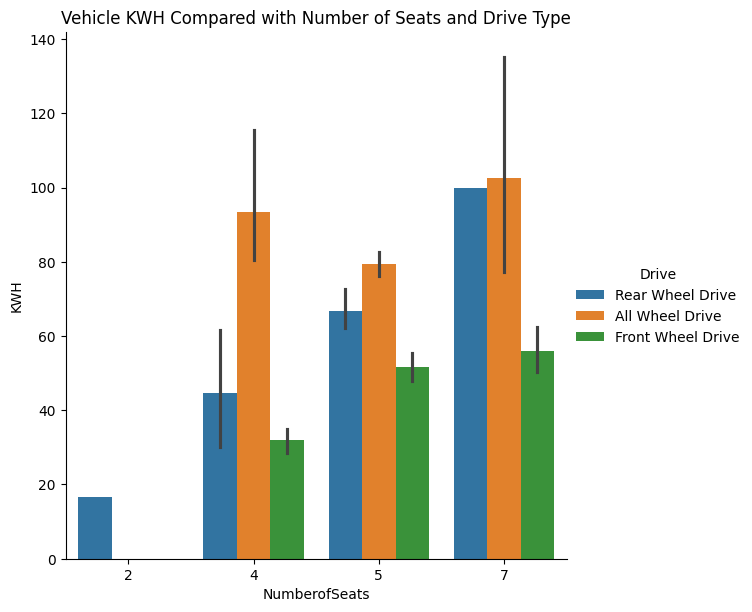

In [73]:
sns.catplot(data=df, kind="bar", x="NumberofSeats", y="KWH",height=6, hue="Drive")
plt.title("Vehicle KWH Compared with Number of Seats and Drive Type")
plt.show()

<Axes: xlabel='count', ylabel='Manufacturer'>

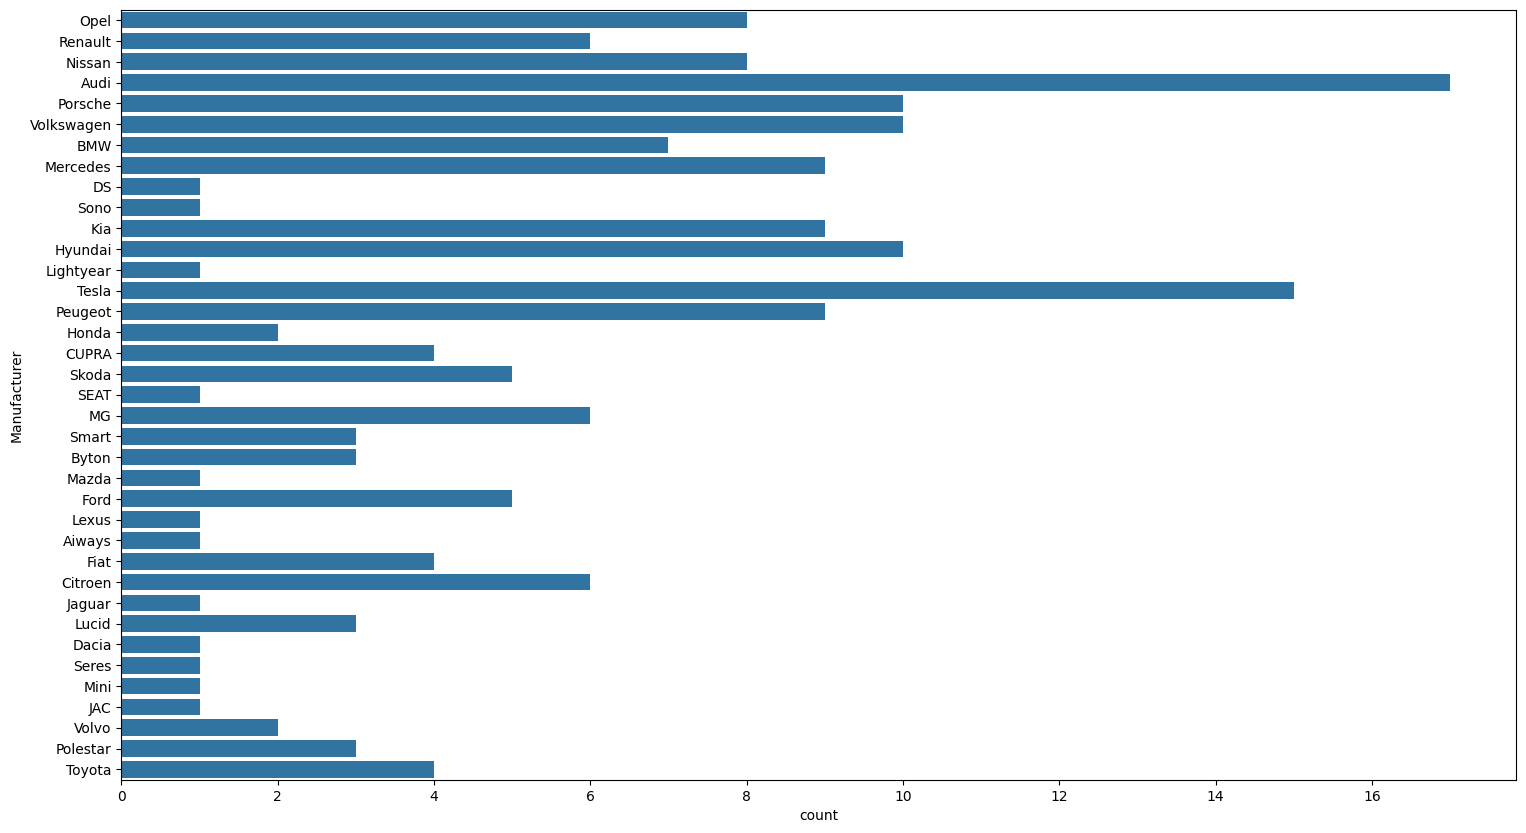

In [74]:
# the various car manufacturers
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = df)

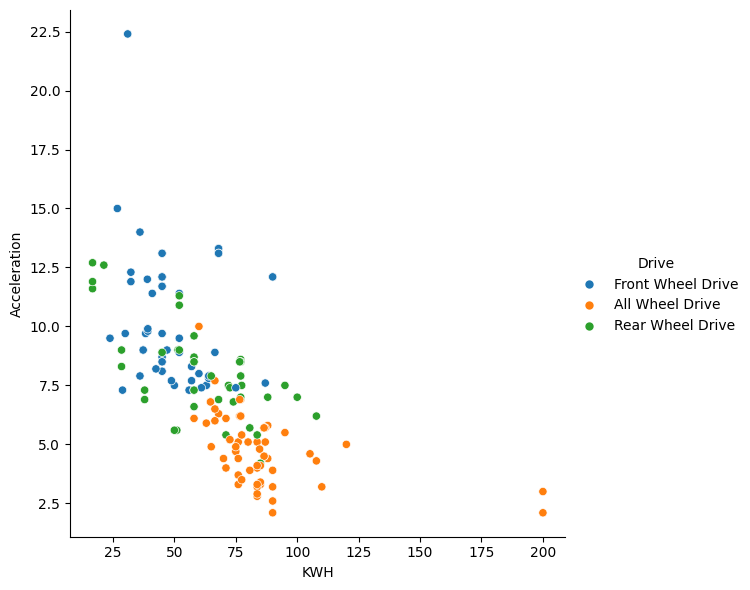

In [75]:
# the relation between acceleration and KWH capacity
sns.relplot(x="KWH", y="Acceleration", height=6,hue="Drive",data=df)

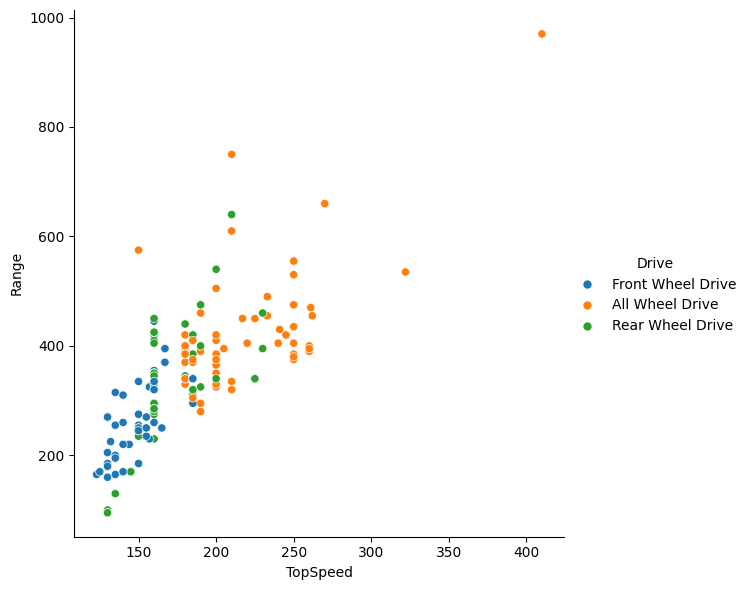

In [76]:
# plot the relation between Top Speed and Vehicle Range
sns.relplot(x="TopSpeed", y="Range",height=6, hue="Drive",data=df)

In [77]:
# the number of empty values in Pounds
c=0
for i in range(0, len(df["PriceinUK"])):
    if (df["PriceinUK"][i]==0):
        c+=1
print('Empty Values:',c)

Empty Values: 44


In [78]:

pd.options.mode.chained_assignment = None

In [79]:
# apply the conversion
for i in range(0, len(df["PriceinUK"])):
    if (df["PriceinUK"][i]==0):
        val=df["PriceinGermany"][i]*0.85
        df["PriceinUK"][i]=val

In [80]:
df.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,36541.5,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680.0,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995.0,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900.0,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830.0,Porsche


In [81]:
df['PriceinUK'] = df['PriceinUK'].astype(int)

In [82]:
df.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,36541,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


In [83]:
# some data labelling
train_df1=df
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Drive'],return_df=True,
                           mapping=[{'col':'Drive',
'mapping':{'Front Wheel Drive':1,'Rear Wheel Drive':2,'All Wheel Drive':3}}])
#fit and transform train data 
df1_train = encoder.fit_transform(train_df1) #Original data

In [84]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    int32  
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int32  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 15.6+ KB


In [85]:
# the input data, which is taken as X
X= df1_train.drop(['Name', 'PriceinGermany','PriceinUK','Manufacturer'], axis=1)
X=X.values
X

array([[ 58. ,   7.3, 150. , ..., 210. ,   1. ,   5. ],
       [ 31. ,  22.4, 130. , ...,   0. ,   1. ,   5. ],
       [ 36. ,   7.9, 144. , ..., 230. ,   1. ,   5. ],
       ...,
       [ 57. ,   7.7, 185. , ..., 340. ,   1. ,   5. ],
       [ 76.6,   6.9, 180. , ..., 470. ,   3. ,   5. ],
       [ 76.6,   8.5, 160. , ..., 520. ,   2. ,   5. ]])

In [86]:
y=df1_train['PriceinUK'].values

In [87]:
X.shape

(180, 8)

In [88]:
y.shape

(180,)

In [89]:

# proceeding to the train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [90]:
# create a Random Forest Regressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [91]:
# the predictions
y_pred= regressor.predict(X_test)

In [92]:
# comparison between the test predictions and actual test data
y_test

array([ 69905,  30730,  42000,  38845, 110980,  32550,  43248,  28420,
        48000,  45145,  28500,  48824,  49750,      0,  57500,  51531,
        49465,  45507,  41330,  25491,  45000,  88700,  74739,  59990,
        21675,  55577,  29740,  43265,  32150,  87820,      0,  54000,
        30500,  90980,  20495,  32121,  54850,  42075,  31500,  63905,
        28730,  48490,  45900,  91905,  49495,  60600,      0,  30594,
        45000,  87000, 118980,  65720,  30255,  30550,  43900,  41570,
        48195,  70665,  29750,  83580])

In [93]:
y_pred

array([ 54441.6325    ,  31066.27555556,  41380.        ,  45479.69333333,
       114520.10011111,  35399.57666667,  40735.42897222,  32830.70111111,
        54001.08666667,  54295.79666667,  31681.26083333,  49643.10804365,
        40735.42897222,  35409.45458333,  64010.02277778,  49643.10804365,
        46875.94537302,  44265.14      ,  47877.97145238,  26695.64938889,
        53521.39666667,  71343.52896032,  74522.66555556,  86362.50333333,
        31944.27194444,  49637.88687698,  33099.70666667,  50518.21761905,
        36664.97611111,  84756.28011111,  26485.26066667,  55484.98333333,
        33099.70666667,  81142.91716667,  23535.63061111,  36504.92666667,
        49637.88687698,  41719.56333333,  31008.96444444,  71014.14102381,
        33094.92033333,  53272.6       ,  54491.59777778,  64035.14169048,
        49643.10804365,  58952.72694444,  23120.55166667,  37367.93833333,
        48409.47016667,  70814.42507143, 127800.99333333,  53660.58111111,
        32744.97711111,  

In [94]:
# Mean Absolute Error(MAE)
print("MAE: ",mean_absolute_error(y_test,y_pred))
# Mean Squared Error(MSE)
print("MSE: ",mean_squared_error(y_test,y_pred))
# Root Mean Squared Error(RMSE)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
# R Squared (R2)
r2 = r2_score(y_test,y_pred)
print("R2: ",r2)

MAE:  7155.050407804233
MSE:  107902152.72013463
RMSE:  10387.596099200942
R2:  0.815987092758551
